### Step 1: Project Title & Objective

# Walmart – Confidence Interval and CLT Analysis

### 🎯 Objective:
Walmart wants to analyze customer purchase behavior, particularly how **purchase amount** differs based on:
- Gender
- Marital Status
- Age Group

We will use **confidence intervals** and the **Central Limit Theorem (CLT)** to estimate population averages and guide business decisions.

---

### 🔍 Key Questions:
1. Do women spend more per transaction than men?
2. What are the confidence intervals for male and female average purchases?
3. Are these intervals overlapping?
4. What insights can we draw for married vs unmarried and different age groups?

---


### ✅ Step 2: Imports and Initial Setup

In [6]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stats tools
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Visual setup
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


### ✅ Step 3: Load Dataset and Initial Preview

In [11]:
# Load dataset
df = pd.read_csv("walmart_data.csv")

# Preview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (550068, 10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Step 4 – Data Types, Missing Values, and Summary Statistics

In [14]:
# Data types
print("Data Types:\n")
print(df.dtypes)

# Missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Statistical summary
print("\nDescriptive Statistics (Numerical Columns):\n")
print(df.describe())


Data Types:

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Missing Values:

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Descriptive Statistics (Numerical Columns):

            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.

### Step 5 – Data Preprocessing: Categorical Type Conversion

In [17]:
# Convert appropriate columns to 'category'
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
df[cat_cols] = df[cat_cols].astype('category')

# Confirm conversion
df.dtypes[cat_cols]


Gender                        category
Age                           category
City_Category                 category
Stay_In_Current_City_Years    category
dtype: object

### ✅ Step 6: Univariate and Bivariate Visualizations

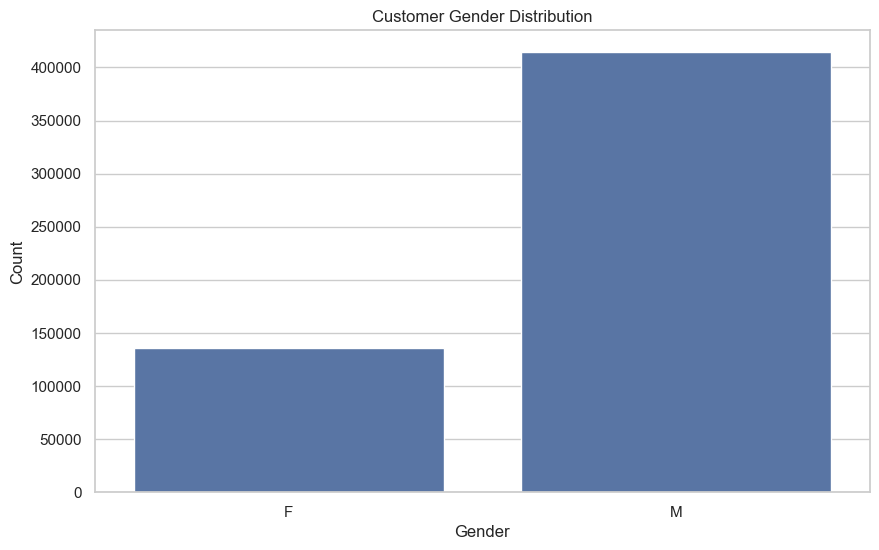

In [20]:
# # Step 6.1 – Gender Distribution
sns.countplot(data=df, x='Gender')
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### 📊 Interpretation – Gender Distribution
Male customers (M) significantly outnumber female customers (F) in the dataset.

But we are told to assume 50 million male and 50 million female customers in the population.

Hence, we’ll treat this as sample data from equal-sized populations and apply confidence interval estimation accordingly.



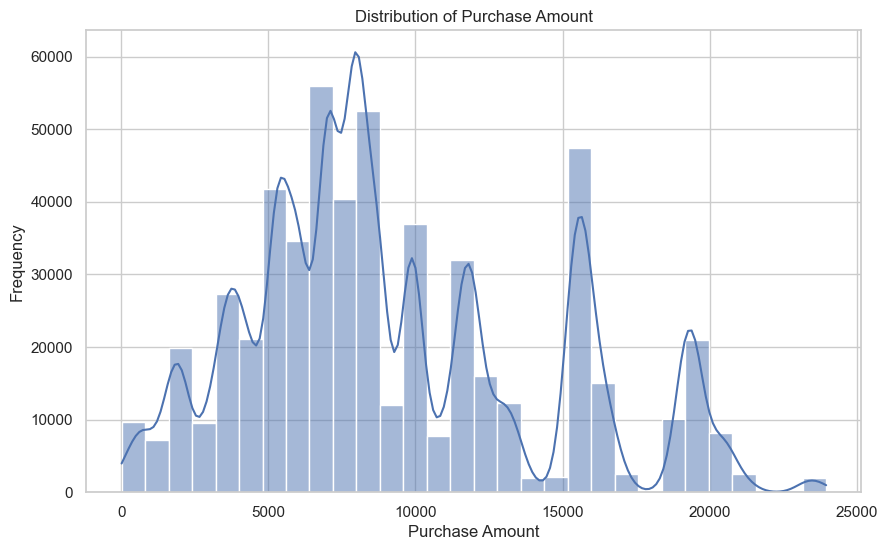

In [22]:
# 📊 6.2 Distribution of Purchase Amount
sns.histplot(data=df, x='Purchase', bins=30, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


#### 📊 Interpretation
The purchase distribution is multi-modal, likely due to pricing tiers or promotions during Black Friday. It’s slightly right-skewed, with some high-value transactions (~₹20,000+), which might impact mean-based metrics — so using the Central Limit Theorem (CLT) is appropriate here.

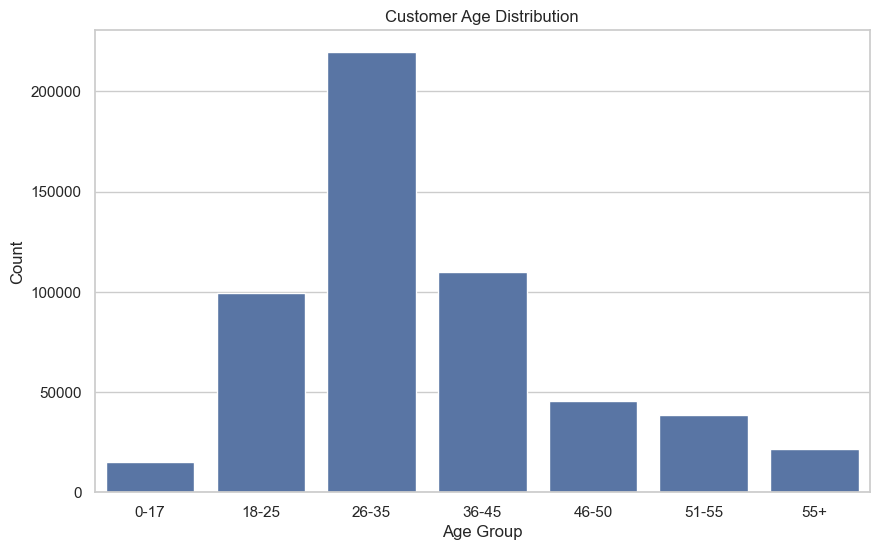

In [31]:
# ✅ Step 6.3 – Countplot: Age Distribution
sns.countplot(data=df, x='Age', order=sorted(df['Age'].unique()))
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


#### Insights:
- The majority of customers fall in the **26–35 age group**, followed by **36–45** and **18–25**.
- The **0–17** and **55+** segments are comparatively underrepresented.
- Walmart's most active shoppers appear to be **young working professionals**.


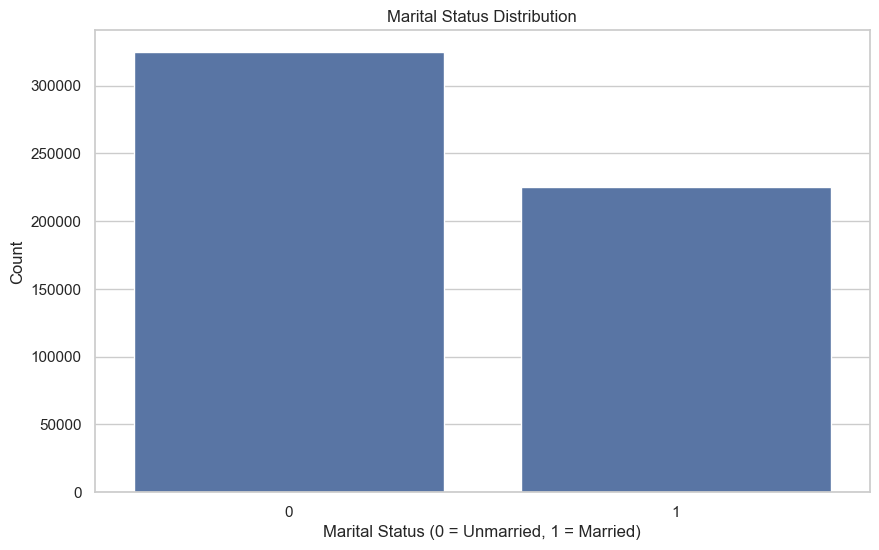

In [33]:
# ✅ Step 6.4 – Countplot: Marital Status
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status (0 = Unmarried, 1 = Married)')
plt.ylabel('Count')
plt.show()


#### Insights:
- Unmarried customers make up a **larger portion** of Walmart’s customer base than married ones.
- This might reflect a younger customer demographic or more individual (vs. family) Black Friday shoppers.


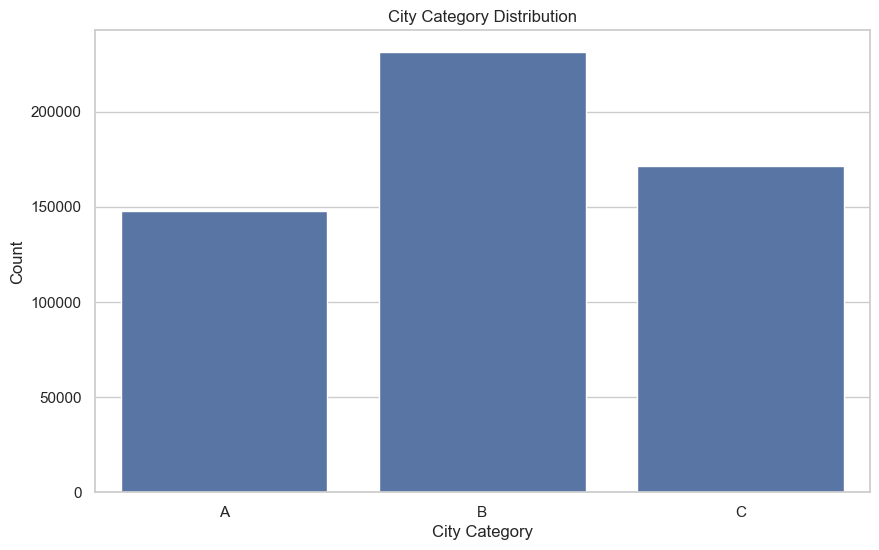

In [35]:
# ✅ Step 6.5 – Countplot: City Category
sns.countplot(data=df, x='City_Category')
plt.title('City Category Distribution')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()


#### Insights:
- Most customers are from **City Category B**, indicating strong demand in mid-tier urban locations.
- Walmart may consider optimizing inventory or marketing in Cities B and C where customer presence is high.


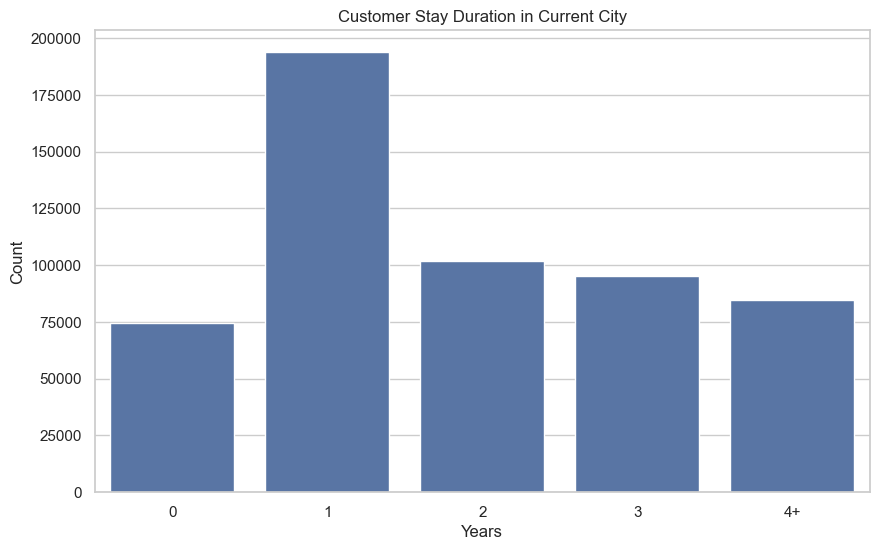

In [37]:
# ✅ Step 6.6 – Countplot: Stay in Current City
sns.countplot(data=df, x='Stay_In_Current_City_Years', order=sorted(df['Stay_In_Current_City_Years'].unique()))
plt.title('Customer Stay Duration in Current City')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()


#### Insights:
- A large share of customers (almost 200,000) are relatively new, having stayed in their current city for just **1 year**.
- This might indicate Walmart’s growing popularity among new migrants or newly settled customers.
- Marketing campaigns can be tailored to **new movers** or people who have stayed less than 2 years.


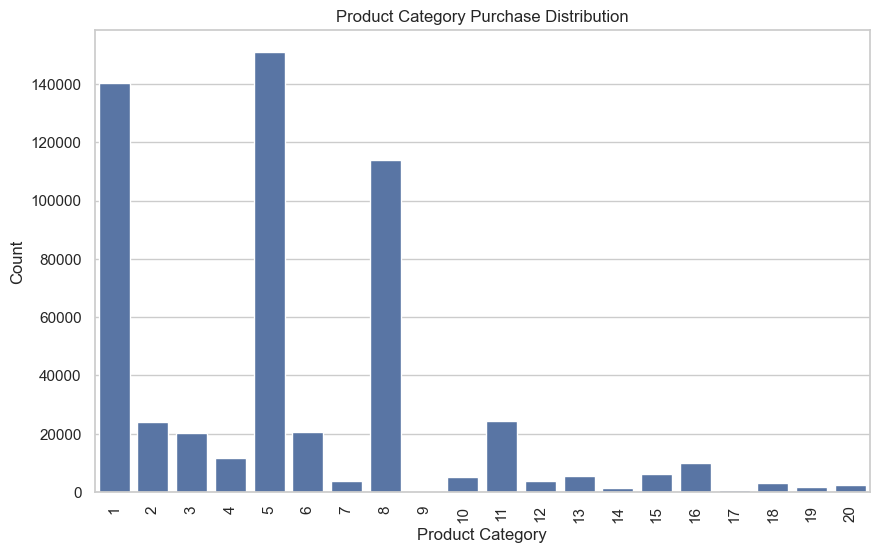

In [39]:
# ✅ Step 6.7 – Countplot: Product Category Distribution
sns.countplot(data=df, x='Product_Category')
plt.title('Product Category Purchase Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


#### Insights:
- Product Categories **1, 5, and 8** are the most popular among Walmart Black Friday shoppers.
- These may correspond to high-demand items like electronics, home goods, or clothing (actual product names not given).
- Targeted inventory planning and promotions in these categories can boost sales further.


### ✅ Step 6.8 – Boxplots to Explore Group-wise Spending Patterns

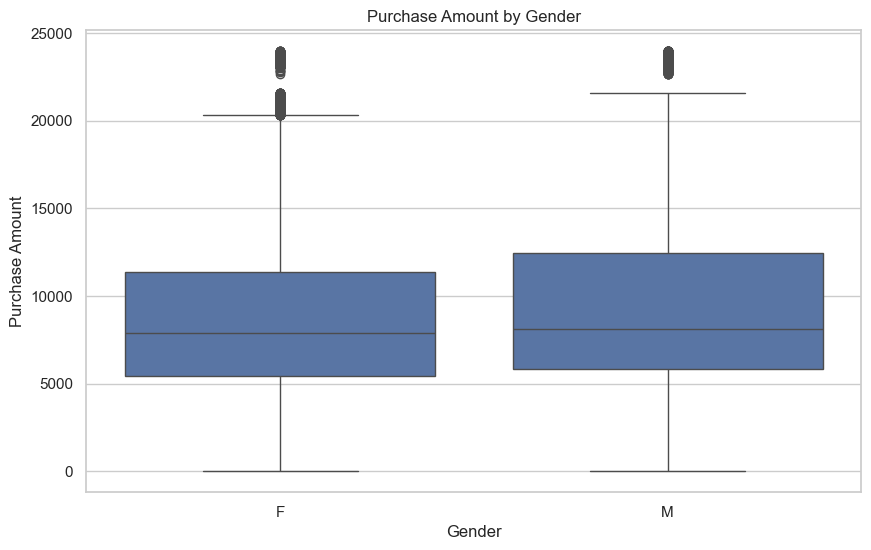

In [51]:
# 📦 6.8.1 Purchase by Gender

sns.boxplot(data=df, x='Gender', y='Purchase')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


#### Insights
- Male customers tend to spend slightly more than females on average.
- Outliers exist in both genders, possibly representing premium purchases during Black Friday.


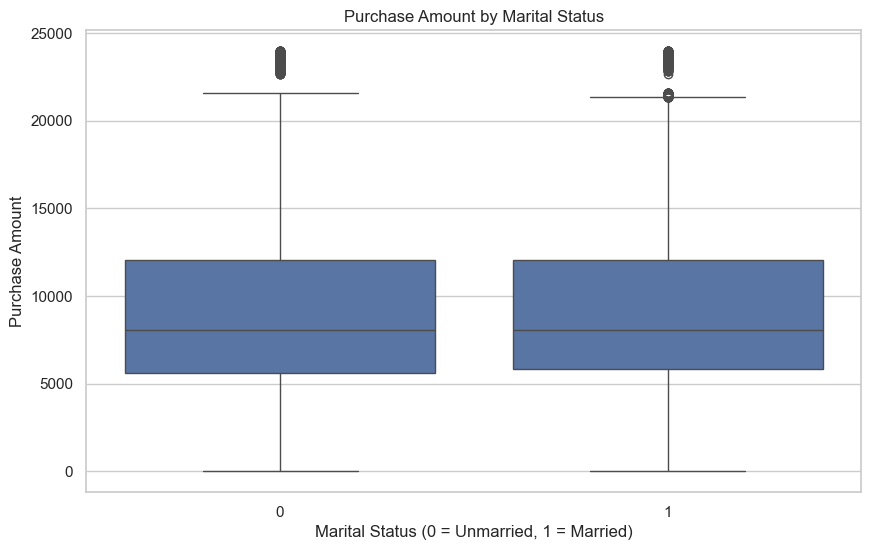

In [54]:
# 6.8.2 Purchase by Marital Status
sns.boxplot(data=df, x='Marital_Status', y='Purchase')
plt.title('Purchase Amount by Marital Status')
plt.xlabel('Marital Status (0 = Unmarried, 1 = Married)')
plt.ylabel('Purchase Amount')
plt.show()


#### Insights
- Both married and unmarried customers show similar purchase behavior in terms of median and spread.
- Outliers exist for both groups, but the overall distribution appears balanced.



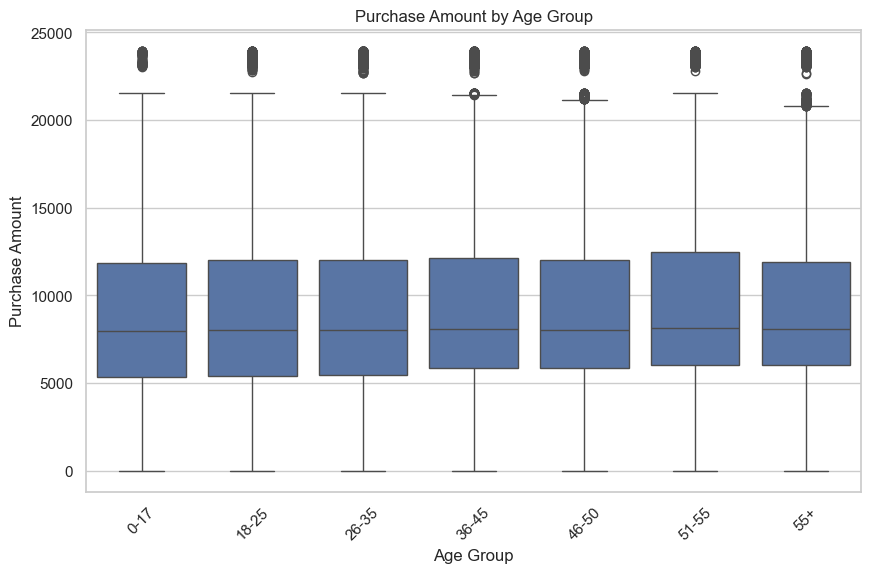

In [56]:
# 👶 6.8.3 Purchase by Age Group
sns.boxplot(data=df, x='Age', y='Purchase', order=sorted(df['Age'].unique()))
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()


#### Insights
- Spending behavior appears fairly **consistent across age groups**, with only minor differences in medians.
- Age groups like **51–55** and **36–45** may have slightly higher spending.
- The presence of high-value purchases across all age groups implies a wide appeal for premium products.



### ✅ Step 7.3 – Grouped Barplots for Mean Purchase Amounts

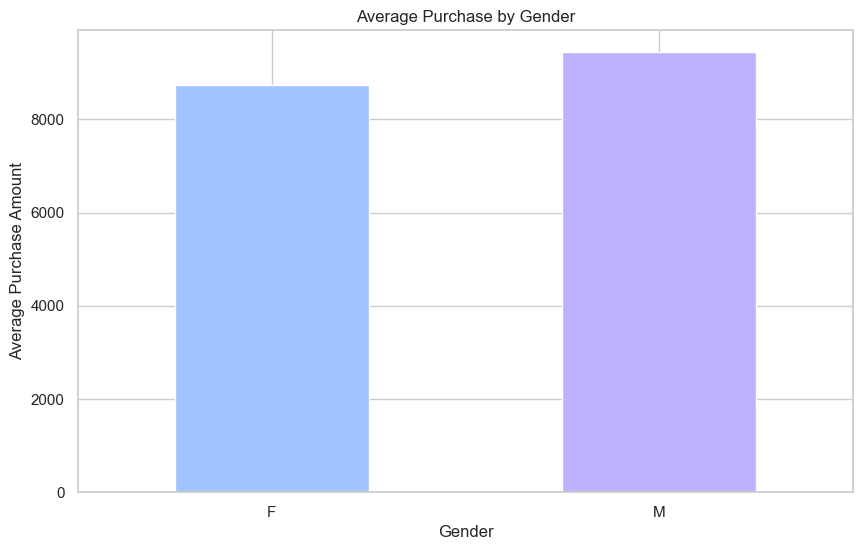

In [62]:
# 📊 7.3.1 Mean Purchase by Gender
df.groupby('Gender')['Purchase'].mean().plot(kind='bar', color=['#A0C4FF', '#BDB2FF'])
plt.title('Average Purchase by Gender')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()


#### Insights
- Male customers spend more on average than female customers.
- This reinforces the boxplot and confidence interval analysis, showing a consistent trend.


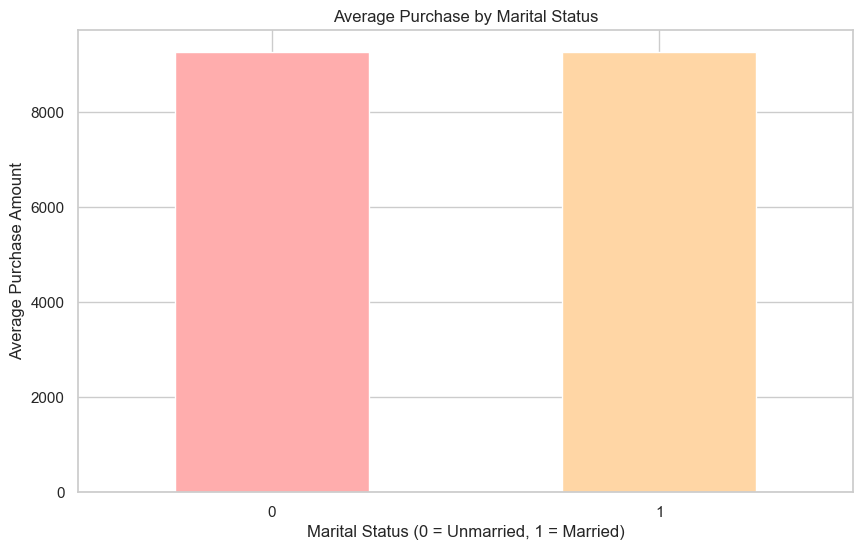

In [64]:
# 💍 7.3.2 Mean Purchase by Marital Status
df.groupby('Marital_Status')['Purchase'].mean().plot(kind='bar', color=['#FFADAD', '#FFD6A5'])
plt.title('Average Purchase by Marital Status')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Marital Status (0 = Unmarried, 1 = Married)')
plt.xticks(rotation=0)
plt.show()


#### Insights
- Average spending by married and unmarried customers is nearly the same.
- Any promotional strategy should **not heavily differentiate** between marital status groups unless further segmentation reveals differences.


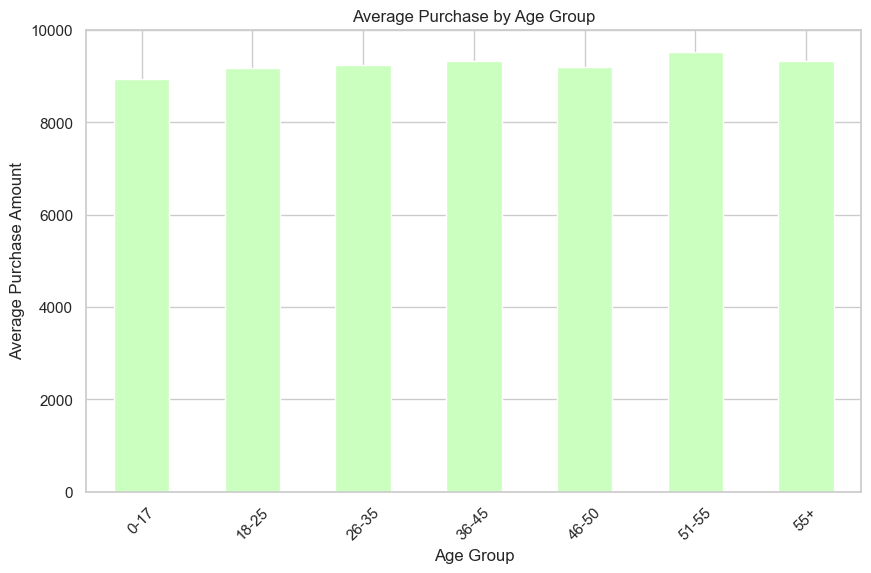

In [66]:
# 👶 7.3.3 Mean Purchase by Age Group
df.groupby('Age')['Purchase'].mean().loc[sorted(df['Age'].unique())].plot(kind='bar', color='#CAFFBF')
plt.title('Average Purchase by Age Group')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


#### Insights
- Older age groups (especially 51–55) tend to spend marginally more on average than younger groups.
- Walmart could consider age-tailored promotional strategies, especially targeting 36–55 age segments for high-ticket products.


### ✅ Step 8 – Confidence Intervals and CLT-Based Analysis

In [72]:
# ✅ Step 8.1 – Confidence Intervals for Marital Status Groups
# Z-score for 95% confidence
z = 1.96

# Split data
unmarried = df[df['Marital_Status'] == 0]['Purchase']
married = df[df['Marital_Status'] == 1]['Purchase']

# Unmarried CI
n_u = len(unmarried)
mean_u = unmarried.mean()
std_u = unmarried.std()
se_u = std_u / np.sqrt(n_u)
ci_u = (mean_u - z * se_u, mean_u + z * se_u)

# Married CI
n_m = len(married)
mean_m = married.mean()
std_m = married.std()
se_m = std_m / np.sqrt(n_m)
ci_m = (mean_m - z * se_m, mean_m + z * se_m)

# Display Results
print(f"Unmarried 95% CI: {ci_u[0]:.2f} to {ci_u[1]:.2f}")
print(f"Married   95% CI: {ci_m[0]:.2f} to {ci_m[1]:.2f}")


Unmarried 95% CI: 9248.62 to 9283.20
Married   95% CI: 9240.46 to 9281.89


#### 🧠 Interpretation:
The difference in average purchases between married and unmarried customers is not statistically significant.

The overlap suggests that any observed variation in spending is likely due to sampling variability, not a meaningful behavioral difference.



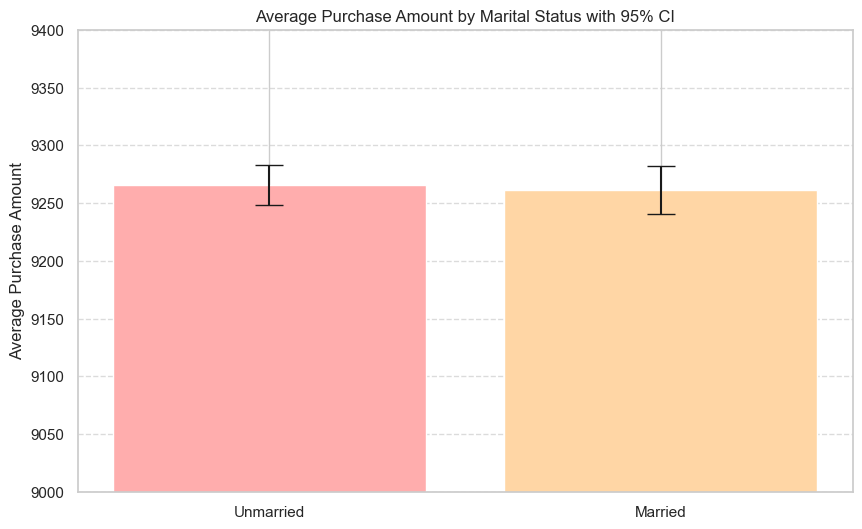

In [75]:
# ✅ Step 8.2 – Plot Confidence Intervals for Marital Status
# Bar plot with error bars

import matplotlib.pyplot as plt

# Mean values
means = [mean_u, mean_m]
errors = [z * se_u, z * se_m]

# Labels
labels = ['Unmarried', 'Married']

# Plot
plt.bar(labels, means, yerr=errors, capsize=10, color=['#FFADAD', '#FFD6A5'])
plt.title('Average Purchase Amount by Marital Status with 95% CI')
plt.ylabel('Average Purchase Amount')
plt.ylim(9000, 9400)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Interpretations

The bars are nearly equal and the error bars (CIs) clearly overlap, confirming no significant difference between married and unmarried customers.

This plot makes the conclusion visually intuitive for business stakeholders.

### ✅ Step 9 – Confidence Interval Analysis by Age Group

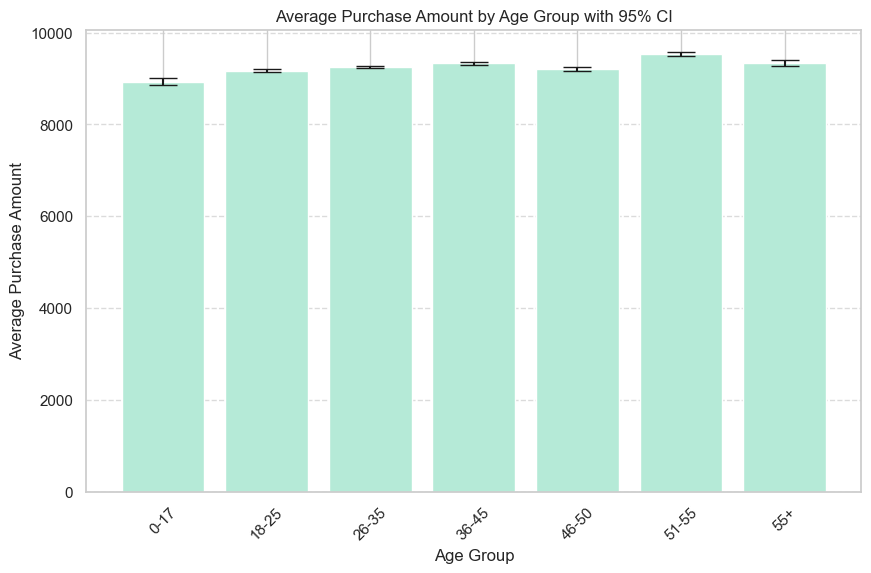

In [79]:
# ✅ Step 9 – Confidence Intervals for All Age Groups
# Z-score for 95% CI
z = 1.96

# Prepare containers
age_groups = sorted(df['Age'].unique())
means = []
errors = []

# Loop over each age group
for age in age_groups:
    data = df[df['Age'] == age]['Purchase']
    n = len(data)
    mean = data.mean()
    std = data.std()
    se = std / np.sqrt(n)
    ci_err = z * se
    
    means.append(mean)
    errors.append(ci_err)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(age_groups, means, yerr=errors, capsize=10, color='#B5EAD7')
plt.title('Average Purchase Amount by Age Group with 95% CI')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 📊 Interpretation of Confidence Intervals by Age Group:
Trend:

Average spending generally increases with age.

Peaks around 51–55, then slightly declines at 55+.

Confidence Intervals:

The 0–17 group clearly spends less — its CI does not overlap with 36–55 groups.

Other groups have small overlaps, but we still observe meaningful group-wise differences.



### ✅ Step 10 – Central Limit Theorem (CLT) Simulation

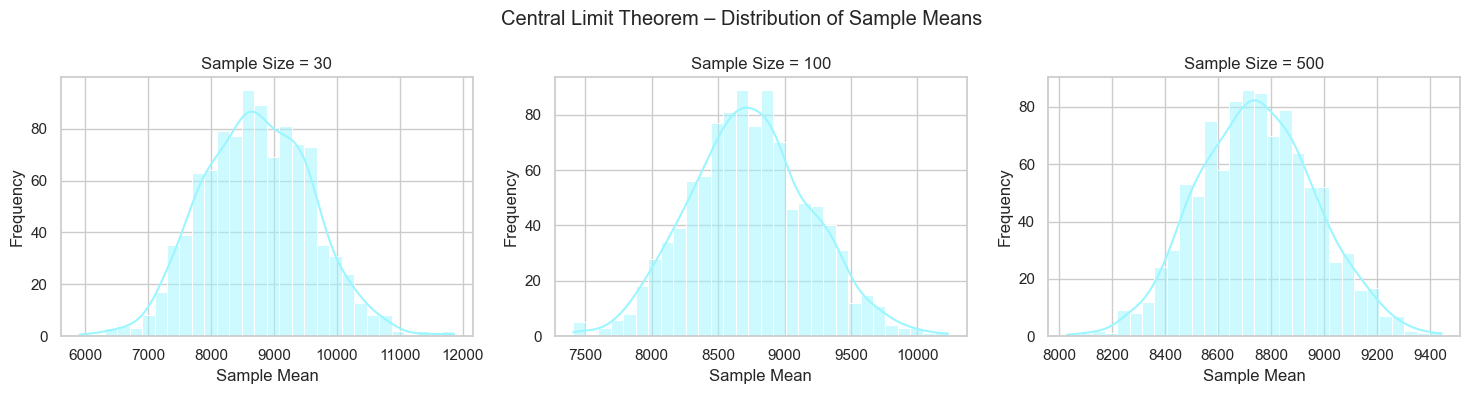

In [83]:
import numpy as np

# Base population: female purchase data
female_purchases = df[df['Gender'] == 'F']['Purchase'].values

# Simulation settings
sample_sizes = [30, 100, 500]
n_simulations = 1000

# Plot setup
plt.figure(figsize=(15, 4))

for i, n in enumerate(sample_sizes, 1):
    sample_means = []

    for _ in range(n_simulations):
        sample = np.random.choice(female_purchases, size=n, replace=True)
        sample_means.append(np.mean(sample))

    # Plot distribution of sample means
    plt.subplot(1, 3, i)
    sns.histplot(sample_means, kde=True, bins=30, color='#9BF6FF')
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')

plt.suptitle('Central Limit Theorem – Distribution of Sample Means')
plt.tight_layout()
plt.show()


#### 📊 Interpretation:
n = 30: Slightly skewed, wide spread

n = 100: More bell-shaped, tighter spread

n = 500: Clearly normal-looking, narrow spread